Standart olan kütüphaneleri import etme, veri setlerini çağırma ve gerekli düzenlemeleri yapma işlemlerini gerçekleştirelim.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv", encoding="windows-1252")
percentage_people_below_poverty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv", encoding="windows-1252")
percent_over_25_completed_highSchool = pd.read_csv("PercentOver25CompletedHighSchool.csv", encoding="windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv", encoding="windows-1252")
kill = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

In [3]:
percentage_people_below_poverty_level.poverty_rate.replace(['-'],0.0,inplace = True)

In [4]:
percentage_people_below_poverty_level.poverty_rate = percentage_people_below_poverty_level.poverty_rate.astype(float)

Öldürülen insanların ırklarının oranını problemini ele alalım. Bu amaç için kill değişkeninde tutulan veri setini kullanmalıyız. Veri setine bir göz atalım.

In [5]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Burada öldürülen insanların ırkına dair bilgileri tutan race sütunu ile ilgileneceğiz.

In [6]:
kill.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

Veri setinde race sütununun ilk 15 satırı yukarıda gördüğümüz şekildedir.

In [7]:
kill.race.dropna(inplace = True)

Yukarıdaki satır ile race sütununda NaN yazan ya da boş bırakılan kısımları data'dan çıkardım. Ve inplace=True parametresi ile yaptığım çıkarma işlemini kalıcılaştırdım.

In [8]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Yukarıdaki satır ile hangi ırktan kaç tane olduğu bilgisine erişebiliriz. Çıktıda her bir ırktan kaç adet bulunduğunu görüyoruz.

O ifadesi W,B,H,A,N ırkları dışındaki ırkları ifade eder.

In [9]:
labels = kill.race.value_counts().index

Irkların indekslerini alıp labels değişkenine atadım. İndeksleri W,B,H,A,N,O 'dur.

In [10]:
colors = ['grey','blue','red','yellow','green','brown']

6 farklı ırk olduğu için burada 6 farklı renk belirledim. Bunlar Pie Chart'ın renkleridir.

In [11]:
explode = [0,0,0,0,0,0]

Yukarıda tanımladığım explode isimli listede pie chart'ların oranını depolucam. 

In [12]:
sizes = kill.race.value_counts().values

Yukarıdaki satır ile her bir ırktan kaç adet olduğunu buldum ve kaç adet var ise bu değerleri aldım.

Text(0.5, 1.0, 'Killed People According to Races')

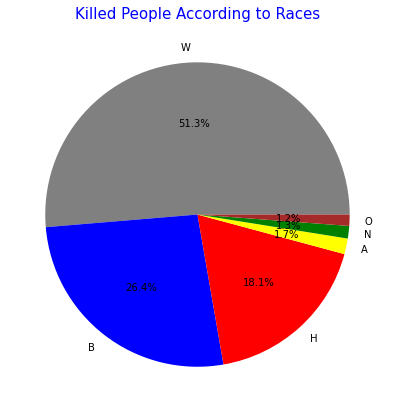

In [13]:
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

Yukarıdaki kod bloğu ile görselleştirme yaptım. x ekseni 7 ve y ekseni 7 boyutunda figüre oluşturdum. 

<font color = 'Red'><br>
! Pie plot seaborn kütüphanesinin değil matplotlib'in görselleştirme plotudur.
    
    
<font color = 'Black'>    
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%') satırında ilk parametrede ırkların adet bilgilerini tutan sizes değişkeni bulunmakta. 2.parametrede oluşturduğum liste bulunmakta. 3.parametrede W,B gibi ırk isimlerinin tutulduğu labels değişkeni bulunmakta. autopct='%1.1f%%' parametresi ile de ondalıklı kısmın kaç hane olacağı bilgisi belirtilmiştir.

Çıktıyı yorumlayalım. Öldürülen insanların %51.3 'ü W ırkına aitmiş. %18.1'i H (ispanyol) ırkına aitmiş.